# YOLO

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [14]:
vidcap = cv2.VideoCapture('feeding-ducks.mp4')

# Get the frame rate of the video
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
print("fps: ", fps)

# Read the first frame
success, image = vidcap.read()
count = 0
success = True

while success:
  # Get the timestamp for the current frame
  timestamp_ms = vidcap.get(cv2.CAP_PROP_POS_MSEC)  # Get timestamp in milliseconds

  # Convert milliseconds to s
  timestamp_seconds = timestamp_ms / 1000.0  

  # Print the timestamp for the current frame
  print(f"Frame {count}: Timestamp :{timestamp_seconds:.2f}")

  # Save the current frame
  cv2.imwrite(f"frame{count}.jpg", image)

  # Move to the next frame per sec
  for _ in range(fps):
    success, image = vidcap.read()
    count += 1

fps:  30
Frame 0: Timestamp :0.00
Frame 30: Timestamp :1.00
Frame 60: Timestamp :2.00
Frame 90: Timestamp :3.00
Frame 120: Timestamp :4.00
Frame 150: Timestamp :5.00
Frame 180: Timestamp :6.00
Frame 210: Timestamp :7.00
Frame 240: Timestamp :8.00
Frame 270: Timestamp :9.00


_The frames detected using YOLO are saved in darknet/data/pics_of_predictions_

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Text(0.5, 1.0, 'YOLO Object Detection')

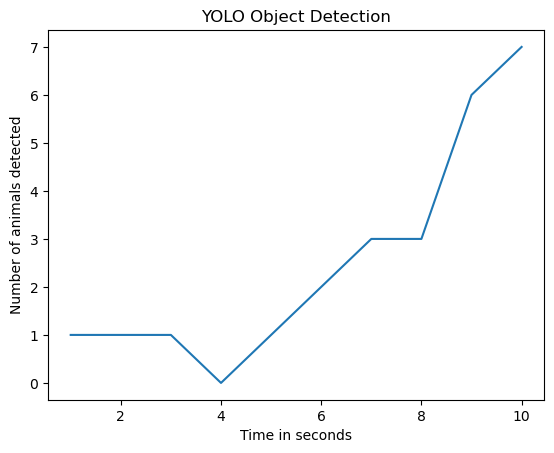

In [6]:
# Generate a plot of count of animals against time
number_of_animals = [1, 1, 1, 0, 1, 2, 3, 3, 6, 7]
duration = list(range(1, 11)) # the vid was 10 secs long
# print(duration)

plt.plot(duration, number_of_animals)
plt.xlabel('Time in seconds')
plt.ylabel('Number of animals detected')
plt.title('YOLO Object Detection')

### Introduction: I like animals and ducks in particular, so I picked a timelapse video of humans feeding ducks. One or two example images with the predicted bounding boxes for object class is in darknet/pics_of_predictions. The original video is feeding-ducks.mp4 in this same directory. 

### Method: I split the video into 30 frames per second based on its fps to get the frame at every second and then ran Yolo on the frames, counting the number of birds (birds as in the further images there are both ducks and pelicans?). 

### Result of plot is above. 

### Analysis of Results: More animals are very quick to come to humans when they recognise that other animals are being fed. But this is not surprising. 

### Analysis of Vision Algorithms: I realised that YOLO is not very good at identifying objects that are close to the right boundary of the frame, eg in prediction_4.jpg it missed out on identifying the birds. It is also not good at detecting every object when multiple objects are clustered together. 